# A05

---

## Programming Environment

In [88]:
R.version.string
.libPaths()

library(dcData)
library(tidyverse)
library(mosaic)

[1] "R version 4.3.0 (2023-04-21)"

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"

---

In [21]:
?BabyNames

BabyNames                package:dcData                R Documentation

_N_a_m_e_s _o_f _c_h_i_l_d_r_e_n _a_s _r_e_c_o_r_d_e_d _b_y _t_h_e _U_S _S_o_c_i_a_l _S_e_c_u_r_i_t_y _A_d_m_i_n_i_s_t_r_a_t_i_o_n.

_D_e_s_c_r_i_p_t_i_o_n:

     The US Social Security Administration provides yearly lists of
     names given to babies. These data combine the yearly lists.

     `BabyNames` is the raw data from the SSA. The case is a
     year-name-sex, for example: Jane F 1922. The count is the number
     of children of that sex given that name in that year. Names
     assigned to fewer than five children of one sex in any year are
     not listed, presumably out of privacy concerns.

_U_s_a_g_e:

     data("BabyNames")
     
_F_o_r_m_a_t:

     A data frame with 1,792,091 entries on four variables:

     name The given name (character string)

     sex F or M (character string)

     count The number of babies give

In [36]:
head (x = dcData::BabyNames)
count(x = dcData::BabyNames, sex)
count(x = dcData::BabyNames, year) %>%
  arrange(desc(n)) %>%
    head(n = 10)
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    head(n = 10)
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    filter(count == 5)

,name,sex,count,year
,<chr>,<chr>,<int>,<int>
1,Mary,F,7065,1880
2,Anna,F,2604,1880
3,Emma,F,2003,1880
4,Elizabeth,F,1939,1880
5,Minnie,F,1746,1880
6,Margaret,F,1578,1880


sex,n
<chr>,<int>
F,1062432
M,729659


,year,n
,<int>,<int>
1,2008,35038
2,2007,34925
3,2009,34668
4,2006,34066
5,2010,34027
6,2011,33858
7,2012,33658
8,2013,33072
9,2005,32527


,name,count
,<chr>,<int>
1,Linda,99674
2,Linda,96210
3,James,94758
4,Michael,92711
5,Robert,91652
6,Linda,90994
7,Michael,90629
8,Michael,90512
9,James,88610


name,count
<chr>,<int>
Adelle,5
Adina,5
Adrienne,5
Albertine,5
Alys,5
Ana,5
Araminta,5
Arthur,5
Birtha,5


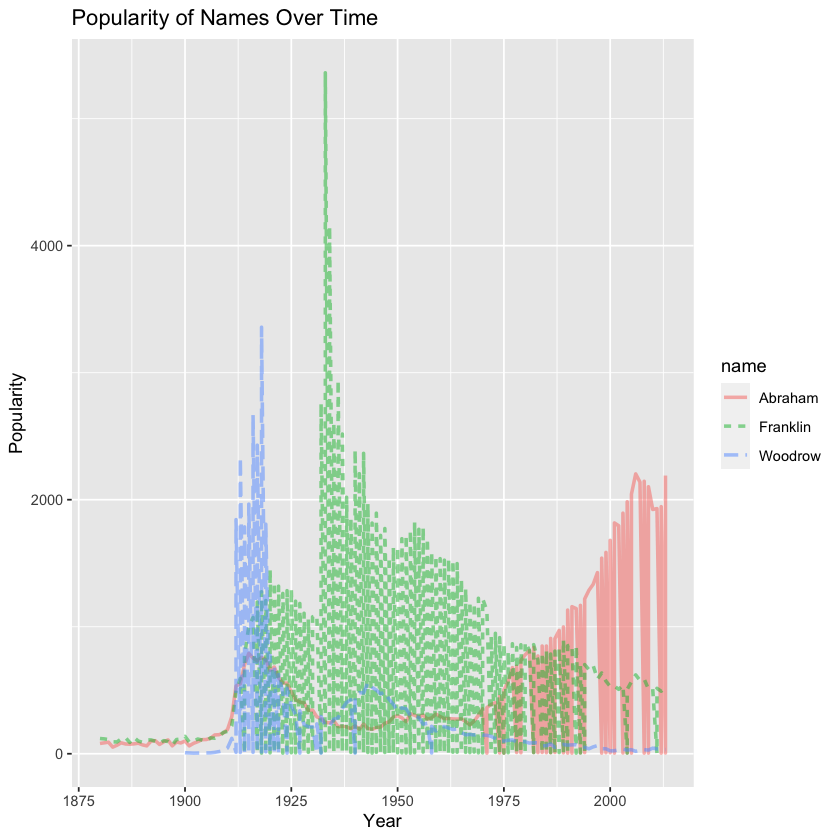

In [114]:
dplyr::filter(.data = dcData::BabyNames, name %in% c('Abraham', 'Franklin', 'Woodrow')) %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = count,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,name,total
<int>,<chr>,<int>
1880,Abraham,81
1880,Franklin,120
1881,Abraham,86
1881,Franklin,117
1882,Abraham,91
1882,Franklin,112


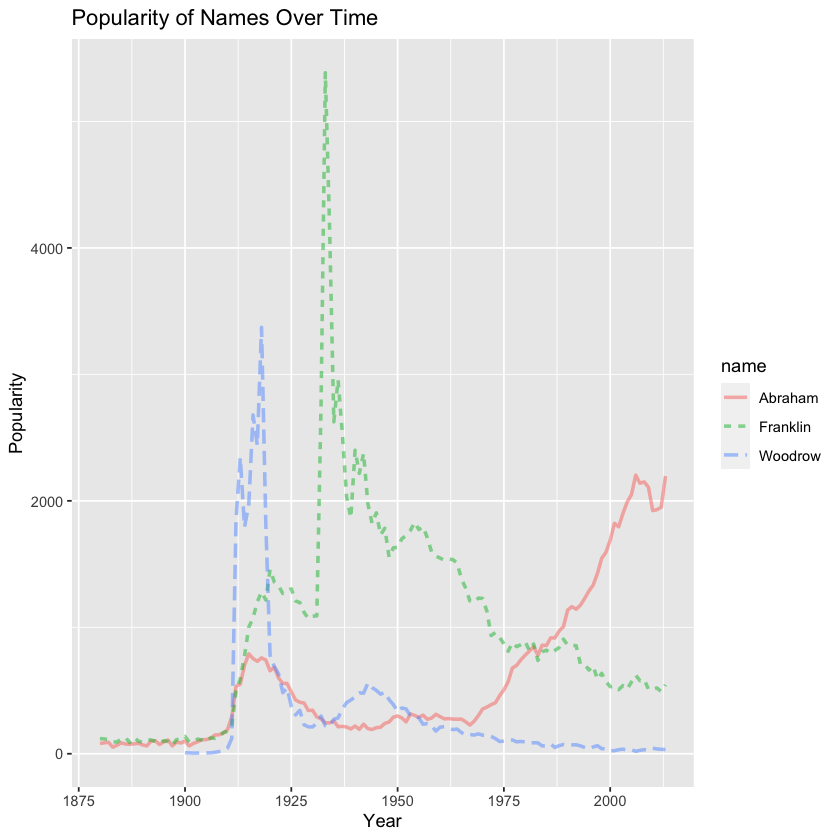

In [113]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Abraham', 'Franklin', 'Woodrow')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

---